## This notebook shows how you can use more of the `fastplotlib` API to create `Graphic` objects and add them to a `GridPlot`

In [1]:
import numpy as np
from fastplotlib import GridPlot

RFBOutputContext()


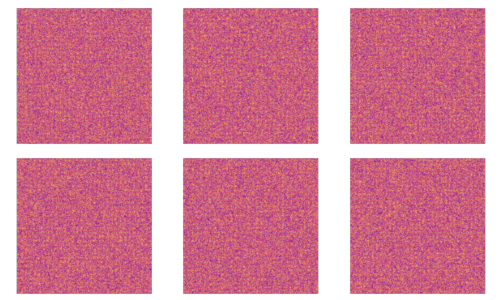

JupyterWgpuCanvas()

In [2]:
# GridPlot of shape 2 x 3
grid_plot = GridPlot(shape=(2, 3))

# a so we can access all our image graphics later
image_graphics = list()

# Make a random image graphic for each subplot
for subplot in grid_plot:
    # create image data
    data = np.random.rand(512, 512)
        
    # add an image to the subplot
    ig = subplot.add_image(data)
    
    # for us to keep track of the image graphics
    image_graphics.append(ig)
    

# Define a function to update the image graphics 
# with new randomly generated data
def update_data():
    for ig in image_graphics:
        new_data = np.random.rand(512, 512)
        ig.update_data(data=new_data)

# add the animation function
grid_plot.add_animations(update_data)

# show the gridplot 
grid_plot.show()

## Accessing subplots within `GridPlot`

In [3]:
# positional indexing
# row 0 and col 0
grid_plot[0, 0]

unnamed: Subplot @ 0x7efdd43e78e0
  parent: None
  Graphics:
	fastplotlib.ImageGraphic @ 0x7efdc790beb0

### You can also get the graphics within a subplot

In [4]:
grid_plot[0, 1].get_graphics()

[fastplotlib.ImageGraphic @ 0x7efdc7925120]

### and change their properties

In [5]:
grid_plot[0, 1].get_graphics()[0].clim = (0.2, 0.5)

### more indexing with `GridPlot`

In [6]:
# you can give them human-readable string names!
grid_plot[0, 2].name = "top-right-plot"

In [7]:
grid_plot["top-right-plot"]

top-right-plot: Subplot @ 0x7efdd4222d70
  parent: None
  Graphics:
	fastplotlib.ImageGraphic @ 0x7efdc7970070

In [8]:
# view its position
grid_plot["top-right-plot"].position

(0, 2)

In [9]:
# these are really the same
grid_plot["top-right-plot"] is grid_plot[0, 2]

True

In [10]:
# change a property
grid_plot["top-right-plot"].get_graphics()[0].clim = (0.3, 0.6)